## Lab 6: Cryptocurrencies

Please complete this lab by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Thursday, April 14**.

In [1]:
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# This is for linear regression
from sklearn.linear_model import LinearRegression

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we [load](https://www.kaggle.com/jessevent/all-crypto-currencies/data) two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [2]:
btc = Table.read_table('btc.csv')
btc.show(5)

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5


In [3]:
eth = Table.read_table('eth.csv')
eth.show(5)

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5


### Visualizing the data.

We can start by looking at the data to see the relationship between two numerical variables using line plots and scatterplots. 

In [4]:
# Create table with information we want
open_prices = Table().with_columns('Day', btc.column('day'), 'Bitcoin', btc.column('open'), 'Ethereum', eth.column('open'))

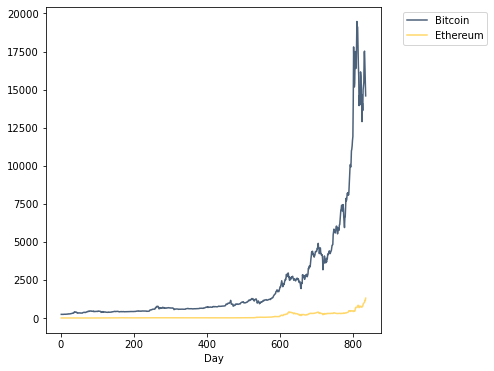

In [5]:
# plot the graph
open_prices.plot('Day')

We can also use a scatterplot to look at the relationship between each open price.

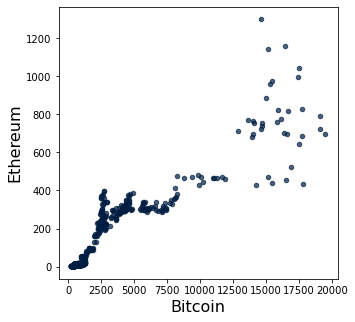

In [6]:
open_prices.scatter('Bitcoin','Ethereum')

<font color = 'red'>**Question 1. Create a line plot that visualizes the BTC and ETH *close* prices as a function of time. Both bth and etc close prices should be plotted on the same graph.**</font>

Since we want close prices, first create a Table called `close_prices` that contains the necessary information, similar to `open_prices` above.

In [ ]:
close_prices = ...





<font color = 'red'>**Question 2. Create a scatterplot that visualizes the BTC and ETH *close* prices.**</font>

### Fitting the model

Now, let's fit a least squares regression line to predict Ethereum open prices using Bitcoin open prices. 

To find a regression line, we can use the `LinearRegression()` object in the `sklearn` package. To do this, we first create a model object, called `ols` below. Think of this object has having all of the instructions for fitting a linear regression.

In [7]:
ols = LinearRegression()

Then we can get the regression output by giving it the `X` and `y` data. Note that we need to provide each of them in a certain format: the `X` needs to take in Table rows (since it can take in multiple variables), while the `y` can take in a numpy array.

In [8]:
predictor = btc.select('open').rows
outcome = eth.column('open')

ols.fit(X = predictor, y = outcome)

LinearRegression()

The `ols` object contains all of the information about the regression fit for the data we have. The slope can be found using the `.coef_` instance variable while the `.intercept` instance variables contains the intercept information.

In [9]:
# Slope
ols.coef_

array([0.05037151])

In [10]:
# Intercept
ols.intercept_

2.138439056906634

<font color = 'red'>**Question 3. What is the form of the equation of the best fit line for predicting Ethereum open prices from Bitcoin open prices? What would your conclusion be about the relationship between the two?**<\font>

*Your answer here.*

<font color = 'red'>**Question 4. Find the slope and intercept of the least squares regression line for predicting Ethereum close prices from Bitcoin close prices. What would you conclude about the relationship between Bitcoin and Ethereum close prices?**</font>

In [ ]:
close_ols = ...
close_predictor = ...
close_outcome = ...

...

### Finding predictions

You can find predicted values by using the `.predict()` method. For example, suppose you wanted to find the predicted Ethereum open price if the Bitcoin open price were 200, 250, or 300. 

In [ ]:
# Make a Table with the Bitcoin prices we want predict with
pred_x = Table().with_columns('btc', make_array(200,250,300))
ols.predict(pred_x.rows)

The predicted Ethereum open prices if Bitcoin open price was 200, 250, or 300 are 12.2, 14.7, or 17.2, respectively.

<font color = 'red'>**Question 5. What would the predicted Ethereum close prices be if the Bitcoin close prices were 100, 150, or 200?**</font>

### Visualizing the Best Fit Line

We can use the predict function to find and draw the line of best fit as well. We simply predict for the `X` values that we fit the model on, and draw a line on top of the scatterplot. Note that we are using the `plot` function from `matplotlib`, which we have brought in as `plt`. In this case, `plt` is analogous to `np` when using a NumPy function.

In [ ]:
open_prices.scatter('Bitcoin','Ethereum')
plt.plot(predictor, ols.predict(predictor) , lw=4, color='gold')

<font color = 'red'>**Question 6. Create a scatterplot of Bitcoin and Ethereum close prices, as well as the linear regression line.**</font>

### Diagnostics

An OLS linear regression isn't always the best way to describe the relationship between two variables. Notably, there are a few assumptions that go along with this method. 

**Some Assumptions**
- The relationship between the x and y variable should be linear.
- The variability of the y variable should be constant as the x variable changes.

If these assumptions aren't met, then it's an indication that using a linear regression might not be appropriate. You can check by using the graph to get an idea for how appropriate the line might be.

<font color = 'red'>**Question 7. Considering the shape of the scatter plot of the close price data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?**</font>

*Type your answer here*

Let's try creating a residual plot now. The code below shows how we might do it using the open prices. We first create a Table called `residuals` that contains the x value, as well as the residual, which we find by taking the difference between the actual outcome and the predicted outcome. Then we use scatter to graph it and add a horizontal line at 0 as a reference.

Remember, we are looking for no pattern in this scatterplot, with points randomly scatter evenly above and below the horizontal line at 0. 

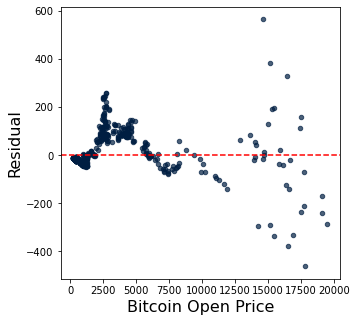

In [18]:
residuals = Table().with_columns('Bitcoin Open Price', btc.column('open'), 
                                 'Residual', outcome - ols.predict(predictor))
residuals.scatter('Bitcoin Open Price', 'Residual')
plt.axhline(y=0, color='red', linestyle='--')

<font color = 'red'>**Question 8. Was it appropriate to use a linear regression to use Bitcoin open prices to predict Etherium open prices? Create a residual plot for the close prices regression. Was it appropriate to use a linear regression for that one?**</font>